# Sistemas de ecuaciones diferenciales lineales

## Ejemplo 1: Eigenvalores distintos, Sección 8.2 Zill 9na edicion

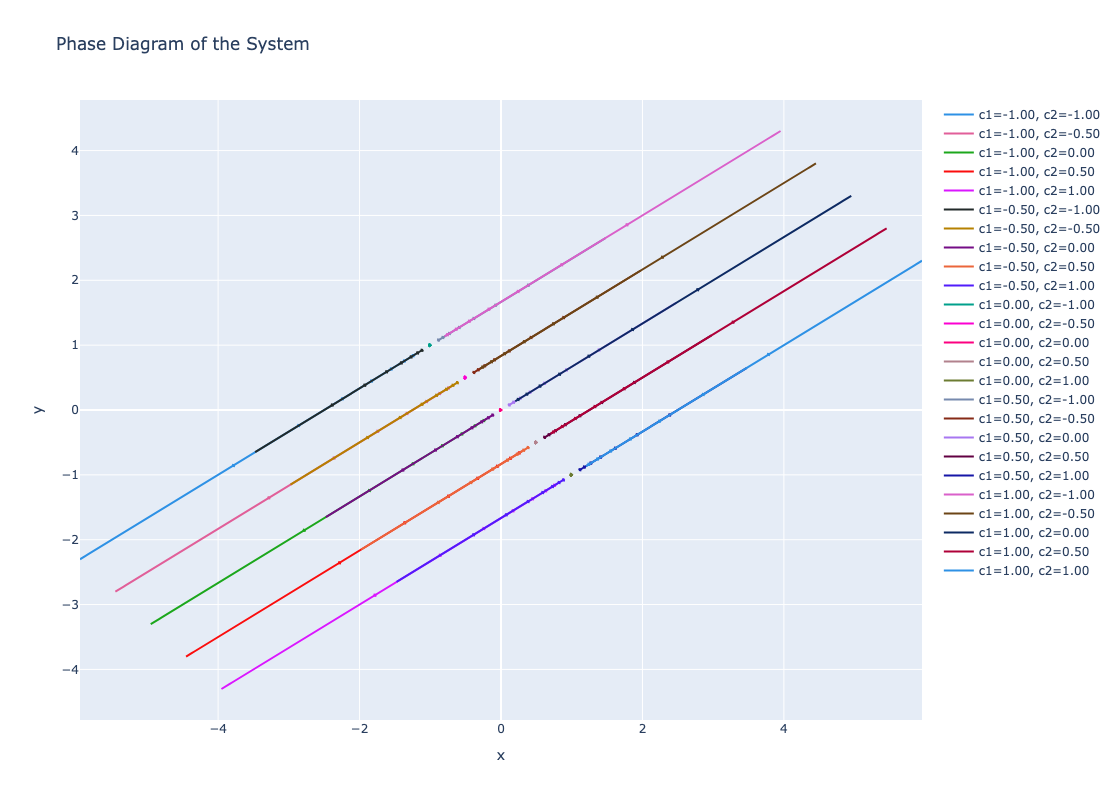

In [19]:
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

# Define the reduced time range for the plot
t = np.linspace(-0.4, 0.4, 400)

# Define the constants c1 and c2
c1_values = np.linspace(-1, 1, 5)
c2_values = np.linspace(-1, 1, 5)

# Define a list of colors for the trajectories
colors = px.colors.qualitative.Dark24

# Initialize lists to hold the x, y, and labels
traces = []

# Generate and plot trajectories for different initial conditions
color_idx = 0
for c1 in c1_values:
    for c2 in c2_values:
        x = c1 * np.exp(4 * t) + c2 * np.exp(-t)
        y = (2/3) * c1 * np.exp(4 * t) - c2 * np.exp(-t)
        # x = c1 * np.exp(4 * t) + c2 * np.exp(-0*t)
        # y = (2/3) * c1 * np.exp(4 * t) - c2 * np.exp(-0*t)
        
        # Add the main trajectory
        trace = go.Scatter(
            x=x, y=y, mode='lines', 
            line=dict(color=colors[color_idx % len(colors)]),
            name=f'c1={c1:.2f}, c2={c2:.2f}'
        )
        traces.append(trace)
        
        # Add arrow markers along the trajectory
        arrow_interval = 50  # Add an arrow every 20 time steps
        for i in range(0, len(t) - arrow_interval, arrow_interval):
            x_mid = (x[i] + x[i + arrow_interval]) / 2
            y_mid = (y[i] + y[i + arrow_interval]) / 2
            u = x[i + arrow_interval] - x[i]
            v = y[i + arrow_interval] - y[i]
            angle = np.arctan2(v, u)
            arrow_x = [
                x_mid, 
                x_mid - 0.03 * np.cos(angle + np.pi / 4), 
                x_mid, 
                x_mid - 0.03 * np.cos(angle - np.pi / 4)
            ]
            arrow_y = [
                y_mid, 
                y_mid - 0.03 * np.sin(angle + np.pi / 4), 
                y_mid, 
                y_mid - 0.03 * np.sin(angle - np.pi / 4)
            ]
            arrow_trace = go.Scatter(
                x=arrow_x, y=arrow_y,
                mode='lines',
                line=dict(color=colors[color_idx % len(colors)], width=2),
                showlegend=False
            )
            traces.append(arrow_trace)
        
        color_idx += 1

# Define the layout
layout = go.Layout(
    title='Phase Diagram of the System',
    xaxis=dict(title='x'),
    yaxis=dict(title='y'),
    showlegend=True,
    width=1000,  # Set the width of the plot
    height=800   # Set the height of the plot
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()


### Terminología
* Las líneas obtenidas para una $c_1$ y una $c_2$ dadas, se llaman trayectorias.
* Al conjunto de trayectorias se lo denomina diagrama de fase.
* El origen del diagrama de fase se denomia punto crítico.

### Observaciones
* Si pensamos en términos físicos, las flechas indican la dirección con que una partícula en el tiempo $t$ se mueve conforme aumenta el tiempo.
* Notar que, con excepción de las semi-rectas del segundo y cuarto cuadrante, todas las trayectorias se alejan del origen.

### Comportamiento para $t\to -\infty$ y $t \to \infty$

Recordando que $x = c_1 e^{4t} + c_2 e^{-t}$ y $y = \frac{2}{3} c_1 e^{4t} - c_2 e^{-t}$, por lo tanto

\begin{equation}
X = c_1 \begin{pmatrix} 1 \\ \frac{2}{3} \end{pmatrix} e^{4t} + c_2 \begin{pmatrix} 1 \\ -1 \end{pmatrix} e^{-t} = c_1 X_1 + c_2 X_2,
\end{equation}

y podemos concluir que:
* Para $t \to -\infty$ $\implies$ $X_1$ es despreciable (ya que $e^{4t}$ es despreciable para $t\to -\infty$). Entonces, decimos que la solución "comienza" asíntotica a una de las semirrectas definida por $\gamma X_2$ o $-\gamma X_2$, donde $\gamma > 0$.
* Para $t \to \infty$ $\implies$ $X_2$ es despreciable (ya que $e^{-t}$ es despreciable para $t\to \infty$). Entonces, decimos que la solución se "desvanece" asintótica a una de las semirrectas dadas por $\gamma X_1$ o $-\gamma X_1$, donde $\gamma > 0$.

### Más observaciones
* El diagrama de fase mostrado es característico de *todos* los sistemas lineales homogéneos 2x2 con autovalores reales de signos opuestos.
* Lo único que cambia para otras combinaciones de $\lambda_1$ y $\lambda_2$ son el sentido de las flechas.

### Estabilidad y el rol de los autovalores

* Decimos que el origen es un **repulsor** cuando $\lambda_1 > 0$ *y* $\lambda_2 > 0$ y el sistema es considerado **inestable**.
* Decimos que el origen es un **atractor** cuando $\lambda_1 < 0$ *y* $\lambda_2 < 0$ y el sistema es considerado **estable**.
* Decimos que el origen es un **punto de silla** cuando los autovalores tienen signos opuestos y el sistema es considerado **inestable** porque:
   *  Pequeñas perturbaciones en la dirección asociada con el autovalor positivo van a crecer.
   *  Sólo perturbaciones *exactamente ubicadas* sobre la dirección del autovalor negativo van a decaer hacia el origen (punto de silla).
* Si el sistema lineal tiene un autovalor nulo, el sistema es considerado inestable porque:
  * Pequeñas perturbaciones en la dirección asociada con el autovalor cero no necesariamente decaerán al origen.
  * Si el autovalor no nulo es positivo, las soluciones se alejarán del origen en la dirección del autovalor no nulo.
  * Si el autovalor no nulo es negativo, las soluciones se acercarán al origen en la dirección del autovalor no nulo, pero la presencia del autovalor cero impide que el sistema sea globalmente estable. Algunos textos pueden catalogar este caso como *neutralmente estable* debido a la coexistencia de direcciones de acercamiento y no movimiento.
* Si el sistema lineal tiene dos autovalores nulos, el sistema **inestable**. Se podría necesitar más análisis dependiendo de la presencia de términos no lineales o la estructura específica de la matriz, dado que el análisis lineal por sí solo no proporciona suficiente información
 
### Conclusión

* Un sistema lineal 2x2 con autovalores reales y distintos, es solamente estable si ambos autovalores son negativos.

## Autovalores nulos

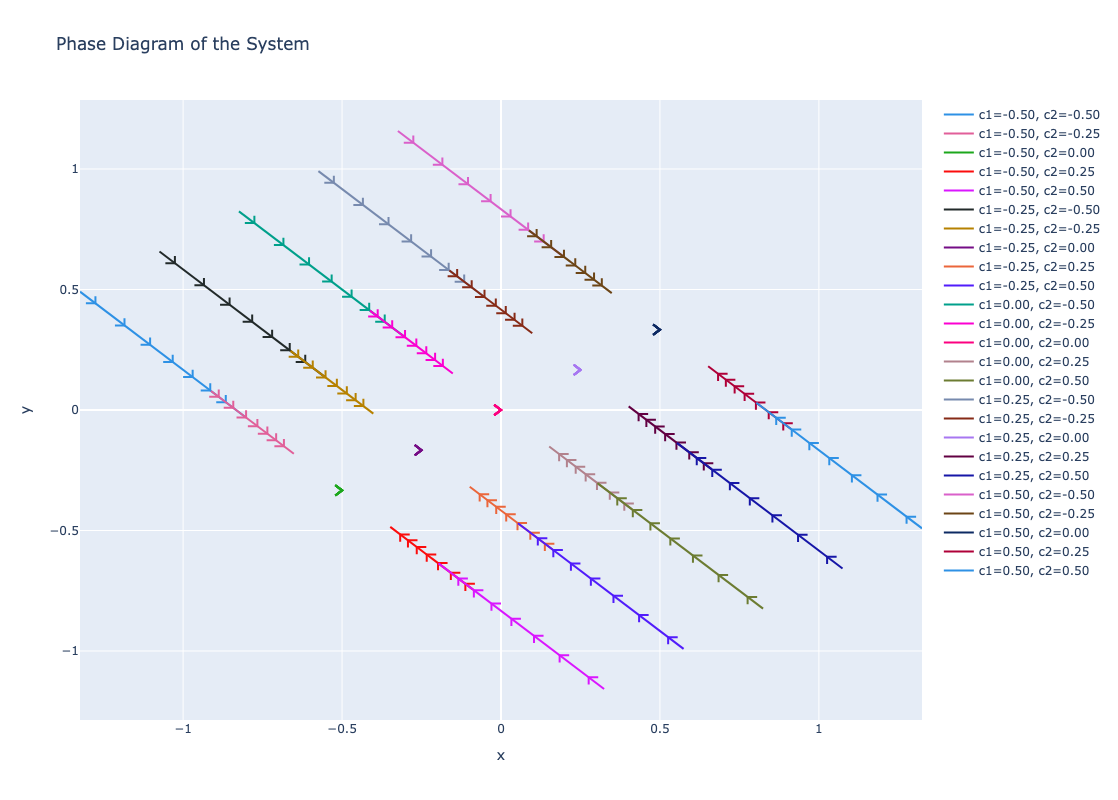

In [47]:
# Define the reduced time range for the plot
t = np.linspace(-0.5, 0.5, 400)

# Define the constants c1 and c2
c1_values = np.linspace(-0.5, 0.5, 5)
c2_values = np.linspace(-0.5, 0.5, 5)

# Define a list of colors for the trajectories
colors = px.colors.qualitative.Dark24

# Initialize lists to hold the x, y, and labels
traces = []

# Generate and plot trajectories for different initial conditions
color_idx = 0
for c1 in c1_values:
    for c2 in c2_values:

        # Autovalor nulo en lambda_2 -> Inestable
        # x = c1 * np.exp(4 * t) + c2 * np.exp(0*t)
        #y = (2/3) * c1 * np.exp(4 * t) + c2 * np.exp(0*t)

        # Autovalor nulo en lambda_1 -> Estable
        x = c1 * np.exp(0 * t) + c2 * np.exp(-t)
        y = (2/3) * c1 * np.exp(0 * t) - c2 * np.exp(-t)
        
        # Add the main trajectory
        trace = go.Scatter(
            x=x, y=y, mode='lines', 
            line=dict(color=colors[color_idx % len(colors)]),
            name=f'c1={c1:.2f}, c2={c2:.2f}'
        )
        traces.append(trace)
        
        # Add arrow markers along the trajectory
        arrow_interval = 50  # Add an arrow every 20 time steps
        for i in range(0, len(t) - arrow_interval, arrow_interval):
            x_mid = (x[i] + x[i + arrow_interval]) / 2
            y_mid = (y[i] + y[i + arrow_interval]) / 2
            u = x[i + arrow_interval] - x[i]
            v = y[i + arrow_interval] - y[i]
            angle = np.arctan2(v, u)
            arrow_x = [
                x_mid, 
                x_mid - 0.03 * np.cos(angle + np.pi / 4), 
                x_mid, 
                x_mid - 0.03 * np.cos(angle - np.pi / 4)
            ]
            arrow_y = [
                y_mid, 
                y_mid - 0.03 * np.sin(angle + np.pi / 4), 
                y_mid, 
                y_mid - 0.03 * np.sin(angle - np.pi / 4)
            ]
            arrow_trace = go.Scatter(
                x=arrow_x, y=arrow_y,
                mode='lines',
                line=dict(color=colors[color_idx % len(colors)], width=2),
                showlegend=False
            )
            traces.append(arrow_trace)
        
        color_idx += 1

# Define the layout
layout = go.Layout(
    title='Phase Diagram of the System',
    xaxis=dict(title='x'),
    yaxis=dict(title='y'),
    showlegend=True,
    width=1000,  # Set the width of the plot
    height=800   # Set the height of the plot
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()
